In [59]:
import re
import tweepy
import numpy as np
import pandas as pd
from tweepy import OAuthHandler
from textblob import TextBlob
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
# Import access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [103]:
# Create an extractor object:
extractor = twitter_setup()

# Create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="havitweets", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# Print the most recent 5 tweets:
print("20 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

20 recent tweets:

Why join the HAVI team? Hear it right from the source – our talented staff from all across the globe! 
https://t.co/zJgMQ6U70P

There’s a new reality for #foodservice establishments as consumers expect high-quality food that is as fresh as pos… https://t.co/VUIsrgDvse

Today is #NationalFroYoDay &amp; @TCBY is celebrating by giving fans a free cup of frozen yogurt! When preparing for th… https://t.co/ThCvd45J5A

Interesting new study for #coffee shop owners &amp; operators to consider – 40% of customers would pay more for hot dri… https://t.co/AYaXKOxGN9

Getting your #logistics right means mastering all the small things &amp; that’s where our expertise can give your busin… https://t.co/ionbr5jmp9



In [104]:
# Create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Why join the HAVI team? Hear it right from the...
1,There’s a new reality for #foodservice establi...
2,Today is #NationalFroYoDay &amp; @TCBY is cele...
3,Interesting new study for #coffee shop owners ...
4,Getting your #logistics right means mastering ...
5,Today’s consumers expect your #supplychain to ...
6,Can machines replace people at #restaurants? @...
7,A food retailer makes the promise of going pla...
8,As #LTOs &amp; promotions continue to rise in ...
9,Why is the new 13-litre gas engine from HAVI &...


In [79]:
# Internal methods of a single tweet object:
# print(dir(tweets[0]))

In [105]:
# print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

961329266700021760
2018-02-07 20:02:12
HubSpot
0
0
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/zJgMQ6U70P', 'expanded_url': 'https://hubs.ly/H09WDjW0', 'display_url': 'hubs.ly/H09WDjW0', 'indices': [103, 126]}]}


In [106]:
# add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [107]:
# Display of first 10 elements from dataframe:
display(data.head(20))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Why join the HAVI team? Hear it right from the...,126,961329266700021760,2018-02-07 20:02:12,HubSpot,0,0
1,There’s a new reality for #foodservice establi...,140,960969131305656321,2018-02-06 20:11:09,HubSpot,0,0
2,Today is #NationalFroYoDay &amp; @TCBY is cele...,144,960923588630142978,2018-02-06 17:10:11,HubSpot,2,1
3,Interesting new study for #coffee shop owners ...,144,959520938294464512,2018-02-02 20:16:33,HubSpot,1,1
4,Getting your #logistics right means mastering ...,144,959473527769493506,2018-02-02 17:08:09,HubSpot,0,0
5,Today’s consumers expect your #supplychain to ...,131,959156567907209217,2018-02-01 20:08:40,HubSpot,4,2
6,Can machines replace people at #restaurants? @...,140,959112889209671681,2018-02-01 17:15:06,HubSpot,3,0
7,A food retailer makes the promise of going pla...,139,958795242022604802,2018-01-31 20:12:53,HubSpot,3,1
8,As #LTOs &amp; promotions continue to rise in ...,144,958750243188854787,2018-01-31 17:14:05,HubSpot,0,0
9,Why is the new 13-litre gas engine from HAVI &...,144,958430392926789632,2018-01-30 20:03:07,HubSpot,0,0


In [108]:
# Extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 136.095


In [109]:
# Extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
#TBT– During the #HAVIweekofgiving, some of our team spent the day helping out our four-legged friends at… https://t.co/pd7DL7XnZZ
Number of likes: 7
130 characters.

The tweet with more retweets is: 
RT @RMHC: Celebrate #DayOfChange #forRMHC families. Bring ur spare change 2 @McDonalds &amp; help keep families together &amp; near the care they n…
Number of retweets: 10
148 characters.



In [110]:
# Create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

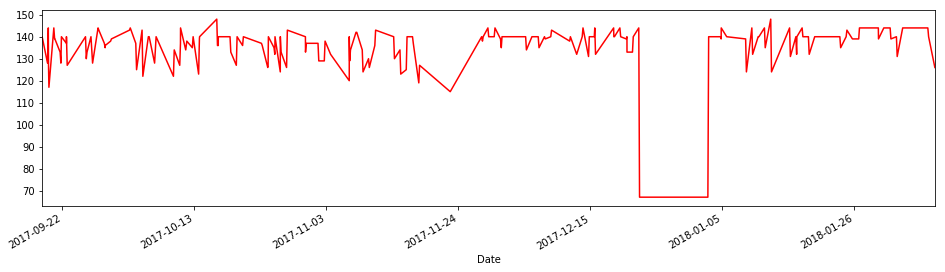

In [111]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

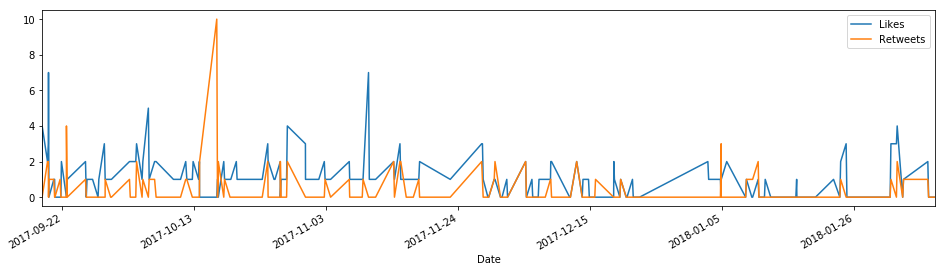

In [112]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [101]:
# Obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# Print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Web Client


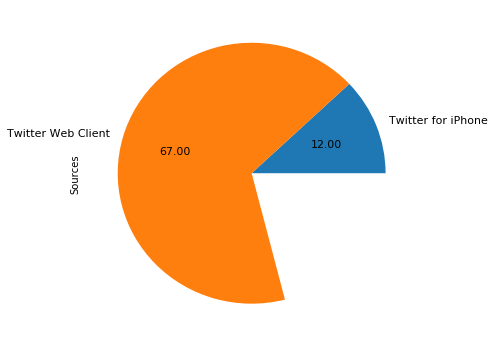

In [102]:
# Create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [27]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [28]:
# Create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# Display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,@yajaira_ambriz Thanks for the love! We’ll see...,61,961069468146454529,2018-02-07 02:49:51,Sprinklr,0,0,1
1,"@kershawsbutt That’s cool, Erin! Sounds like y...",69,961068866553163778,2018-02-07 02:47:28,Sprinklr,2,0,1
2,@adrialexiss Thanks! Coke + us is just the per...,57,961066349266120704,2018-02-07 02:37:28,Sprinklr,0,0,1
3,"@Famous225 We hope you enjoyed your meal, Daniel!",49,961064844551213056,2018-02-07 02:31:29,Sprinklr,0,0,1
4,"@Michael378780 Thanks, Joe! We must be hearing...",95,961064345470996480,2018-02-07 02:29:30,Sprinklr,0,0,1
5,"@nlkbaby Friend, thanks for the love! We’ll se...",62,961064220707172352,2018-02-07 02:29:00,Sprinklr,0,0,1
6,@cahtii Moments like that are exactly why they...,69,961064220463894529,2018-02-07 02:29:00,Sprinklr,0,0,-1
7,"@AbbyCatanzaro Abby, this is what dreams are m...",80,961063969141198849,2018-02-07 02:28:00,Sprinklr,0,0,1
8,@Chazoo92 He sounds like he would be a keeper!,46,961063968927338497,2018-02-07 02:28:00,Sprinklr,1,0,0
9,"@paigederrick14 That’s awesome, Paige! Glad yo...",96,961063849674854400,2018-02-07 02:27:32,Sprinklr,0,0,1


In [29]:
# Construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [30]:
# Print percentages:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 69.0%
Percentage of neutral tweets: 29.0%
Percentage de negative tweets: 2.0%


In [39]:
import from twython import Twython
#from Twython import Twython

TWITTER_APP_KEY = 'yEt3LN3J7u6ug1bRRRFuewV7z' 
TWITTER_APP_KEY_SECRET = 'BZQuy9pRQKumlKyA6siwEew9mapc5GfX6Ox4PLB2Qt3KmfGgYY' 
TWITTER_ACCESS_TOKEN = '849359491841875970-Ovqz0Xn9pVWcgQpjYpwLnHwlrQozrzs'
TWITTER_ACCESS_TOKEN_SECRET = 'rsU96sR7KhwxRyoHK6cZYHGC73oGJarVcFATyX00vmQWb'

t = Twython(app_key=TWITTER_APP_KEY, 
            app_secret=TWITTER_APP_KEY_SECRET, 
            oauth_token=TWITTER_ACCESS_TOKEN, 
            oauth_token_secret=TWITTER_ACCESS_TOKEN_SECRET)

search = t.search(q='#123DollarMenu',count=100)

tweets = search['statuses']

for tweet in tweets:
  print (tweet['id_str'], '\n', tweet['text'], '\n\n\n')

961068738610171904 
 Give them what they want with the “Something for Everyone” meal. @McDonalds #123DollarMenu https://t.co/F2fmyJOTKC https://t.co/7LF4d56Sbz 



961065702223261696 
 Cash in on a “Feels like Payday” meal. @McDonalds #123DollarMenu https://t.co/u1NdmCGCkl https://t.co/09mKHmasuf 



961064266836176896 
 Cash in on a “Feels like Payday” meal. @McDonalds #123DollarMenu https://t.co/1DaYsq9UYe https://t.co/Rj2q1Q3aaN 



961063756259192832 
 Don’t sleep on the “Saving for a Night Out” meal. @McDonalds #123DollarMenu https://t.co/mwwi2vnVQH https://t.co/CY8XuBxRhq 



961063731923996672 
 Give them what they want with the “Something for Everyone” meal. @McDonalds #123DollarMenu https://t.co/mwwi2vFxfh https://t.co/vfrSHSNF5S 



961063662030151680 
 Don’t sleep on the “Saving for a Night Out” meal. @McDonalds #123DollarMenu https://t.co/mwwi2vFxfh https://t.co/IhoLOPjw0G 



961061645953925120 
 Lay out a spread for the “Picnic in the Living Room” meal. @McDonalds #123Dol

In [49]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'yEt3LN3J7u6ug1bRRRFuewV7z'
        consumer_secret = 'BZQuy9pRQKumlKyA6siwEew9mapc5GfX6Ox4PLB2Qt3KmfGgYY'
        access_token = '849359491841875970-Ovqz0Xn9pVWcgQpjYpwLnHwlrQozrzs'
        access_token_secret = 'rsU96sR7KhwxRyoHK6cZYHGC73oGJarVcFATyX00vmQWb'

        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")

    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub('[^a-zA-Z0-9 @ . , : - _]', ' ', str(tweet)).split())

    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []

        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)

            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}

                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)

            # return parsed tweets
            return tweets

        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query = 'McCafe', count = 2000)

    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    # print("Neutral tweets percentage: {} %".format(100*len(tweets - ntweets - ptweets)/len(tweets)))

    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'])

    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'])

if __name__ == "__main__":
    # calling main function
    main()

Positive tweets percentage: 33.72093023255814 %
Negative tweets percentage: 16.27906976744186 %


Positive tweets:
Grind it out👷another good night. 👊 
Fuel 10cents cheaper than this afternoon, pays to wait $1.18 King&amp;Ottawa DTKitch EastSide⛽ 
☕McCafe📝
@luckyduckking Thanks for the shout-out! We hope you have a chance to order soon. 😊
stomach unwell but craving more important 🤪 somebody send me to work again @hannorme 😚 (@ McDonald's/McCafe in Sing… https://t.co/62yzlwZG33
@McCafe Can I sham-rock out with u for free
RT @McDonaldsLeb: Mesmerizing view!
#McCafe #Coffee https://t.co/DvBbxOJ4uJ
hmm....got a li'l too sincere with this 'dream star wars pitches' piece.

oh well?
@JMaserati @Longshot2018 @sleeper_pick89 @brucewaynemayne I know of a nearby McCafe that prob has an old french fry oil bin.... WOOO!!
@brendddaah Thanks for sharing, Brendah! We hope you savor the flavor and enjoy the sweet savings!
RT @RydenxDirtay: When your hubby goes to get you a McCafé because you had a cravi

In [55]:
tweets = api.get_tweets(query = 'dollar menu', count = 2000)

Positive tweets percentage: 31.25 %
Negative tweets percentage: 15.625 %


Positive tweets:
RT @Spyder_gg: TheMeta4Gaming is streaming on his new channel
He's gonna eat 3 cheeseburgers from the dollar menu, 20 piece nugget, large c…
TheMeta4Gaming is streaming on his new channel
He's gonna eat 3 cheeseburgers from the dollar menu, 20 piece nugget… https://t.co/7oHH2IEELz
RT @ScHoolboyQH: Lawmakers are trying to pass a law to make Tide Pods look less appetizing. Fuck it. Make them look more appetizing! Start…
RT @mondayok: @Albz321 Eh they bought back the dollar menu that's a get outta jail free card in my book
@Albz321 Eh they bought back the dollar menu that's a get outta jail free card in my book
I have never, ever wanted a full meal that wasn't on the McDonald's dollar menu or that came from the frozen entree… https://t.co/FcToPRtIrn
@DariusDruid Arby’s locations around here have dollar items but those have been moved to the happy hour section of… https://t.co/kwrwfMHRGf
The new McD